### PCOS PREDICTION MODEL 
This project involves building a binary classification model to predict whether a woman has PCOS. The dataset is taken from Kaggle and includes clinical, demographic, and hormonal features. A stacking ensemble technique is used with K-Nearest Neighbors, Decision Tree, and Random Forest as base learners, and Logistic Regression as the meta-classifier.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
%matplotlib inline
import seaborn as sns


Importing data processing and machine learning libraries

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

## Importing Dataset

In [3]:
dm = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name = 'Full_new' )

# Data cleaing and preprocessing

In [4]:
# removing unnecessary columns

df = dm.drop(columns = ['Sl. No', 'Patient File No.', 'Unnamed: 44']) 

In [5]:
# checking categorical columns

cat_col = [ col for col in df.columns if df[col].dtype == 'object']
print(cat_col)

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']


In [6]:
# After looking at the columns, I found that most values are numeric, some values are strings.
# So, checking which values are string


m = df.shape[0]
error = []
for col in cat_col:
    for i in range(m):
        if isinstance(df.loc[i,col], str):
            error.append([df.loc[i,col], i, col])
print(error)

[['1.99.', 123, 'II    beta-HCG(mIU/mL)'], ['a', 305, 'AMH(ng/mL)']]


In [7]:
# Handling these values

df.loc[123, 'II    beta-HCG(mIU/mL)'] = 1.99
df.drop(305, inplace = True)
for col in cat_col:
    df[col] = df[col].astype(float)

display(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              540 non-null    int64  
 1    Age (yrs)              540 non-null    int64  
 2   Weight (Kg)             540 non-null    float64
 3   Height(Cm)              540 non-null    float64
 4   BMI                     540 non-null    float64
 5   Blood Group             540 non-null    int64  
 6   Pulse rate(bpm)         540 non-null    int64  
 7   RR (breaths/min)        540 non-null    int64  
 8   Hb(g/dl)                540 non-null    float64
 9   Cycle(R/I)              540 non-null    int64  
 10  Cycle length(days)      540 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           540 non-null    int64  
 13  No. of aborptions       540 non-null    int64  
 14    I   beta-HCG(mIU/mL)  540 non-null    float64

None

(540, 42)

In [8]:
# Checking missing values

m = df.isnull().sum()
print(m)

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [9]:
#handling missing values

mv = pd.isnull(df['Fast food (Y/N)']) #returns a boolean series of rows
md = df.loc[mv]
print(md)

     PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)    BMI  Blood Group  \
156           0          27         53.2        158.0  21.3           13   

     Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  ...  \
156                72                22      10.5           4  ...   

     Pimples(Y/N)  Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
156             0              NaN                  1                  120   

     BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
156                    70                 5                 7   

     Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
156                  11.0                  13.0              11.0  

[1 rows x 42 columns]


In [10]:
df1 = df.drop(156)

# Filling the remaining missing value with the mean 

df_f = df1.fillna(df['Marraige Status (Yrs)'].mean())

m = df_f.isnull().sum()
print(m)

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [11]:
# Checking the final cleaned dataframe
display(df_f.info())

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              539 non-null    int64  
 1    Age (yrs)              539 non-null    int64  
 2   Weight (Kg)             539 non-null    float64
 3   Height(Cm)              539 non-null    float64
 4   BMI                     539 non-null    float64
 5   Blood Group             539 non-null    int64  
 6   Pulse rate(bpm)         539 non-null    int64  
 7   RR (breaths/min)        539 non-null    int64  
 8   Hb(g/dl)                539 non-null    float64
 9   Cycle(R/I)              539 non-null    int64  
 10  Cycle length(days)      539 non-null    int64  
 11  Marraige Status (Yrs)   539 non-null    float64
 12  Pregnant(Y/N)           539 non-null    int64  
 13  No. of aborptions       539 non-null    int64  
 14    I   beta-HCG(mIU/mL)  539 non-null    float64

None

In [12]:
# Understanding the dataset 

df_f.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,0.328386,31.428571,59.655844,156.490345,24.317007,13.805195,73.248609,19.237477,11.160260,2.558442,...,0.489796,0.515770,0.244898,114.641929,76.953618,6.135436,6.643785,15.021892,15.455232,8.476568
std,0.470062,5.412364,11.044152,6.041300,4.061852,1.843579,4.438068,1.687260,0.867736,0.901165,...,0.500360,0.500215,0.430426,7.391079,5.568405,4.235869,4.444538,3.568236,3.323245,2.163121
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.674599,13.000000,72.000000,18.000000,10.500000,2.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,0.000000,31.000000,59.600000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,1.000000,35.000000,65.000000,160.000000,26.650813,15.000000,74.000000,20.000000,11.750000,4.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [13]:
# splitting the dataset into the target and features dataset 

target = df_f.loc[:, 'PCOS (Y/N)']
features = df_f.drop('PCOS (Y/N)', axis = 1)


In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0    Age (yrs)              539 non-null    int64  
 1   Weight (Kg)             539 non-null    float64
 2   Height(Cm)              539 non-null    float64
 3   BMI                     539 non-null    float64
 4   Blood Group             539 non-null    int64  
 5   Pulse rate(bpm)         539 non-null    int64  
 6   RR (breaths/min)        539 non-null    int64  
 7   Hb(g/dl)                539 non-null    float64
 8   Cycle(R/I)              539 non-null    int64  
 9   Cycle length(days)      539 non-null    int64  
 10  Marraige Status (Yrs)   539 non-null    float64
 11  Pregnant(Y/N)           539 non-null    int64  
 12  No. of aborptions       539 non-null    int64  
 13    I   beta-HCG(mIU/mL)  539 non-null    float64
 14  II    beta-HCG(mIU/mL)  539 non-null    float64

In [15]:
# removing one of the dependent features 

correlation_matrix = features.corr()
HC =  []
m = correlation_matrix.shape[0]
for i in range(m):
    for j in range(i+1,m):
        if i != j:
            correlation = correlation_matrix.iloc[i,j]
            if abs(correlation) >= 0.9:
                HC.append([i,j])
print(HC)
                

[[1, 3], [15, 17]]


In [16]:
features.drop(columns = ['BMI', 'FSH/LH'], inplace = True)


In [17]:
# Feature selection using correlation 
df_f.corr()['PCOS (Y/N)']

PCOS (Y/N)                1.000000
 Age (yrs)               -0.168663
Weight (Kg)               0.211034
Height(Cm)                0.067716
BMI                       0.198831
Blood Group               0.035349
Pulse rate(bpm)           0.091768
RR (breaths/min)          0.039763
Hb(g/dl)                  0.087147
Cycle(R/I)                0.404372
Cycle length(days)       -0.179474
Marraige Status (Yrs)    -0.113193
Pregnant(Y/N)            -0.029654
No. of aborptions        -0.058308
  I   beta-HCG(mIU/mL)   -0.028141
II    beta-HCG(mIU/mL)    0.012391
FSH(mIU/mL)              -0.030485
LH(mIU/mL)                0.063758
FSH/LH                   -0.018358
Hip(inch)                 0.161237
Waist(inch)               0.163828
Waist:Hip Ratio           0.013061
TSH (mIU/L)              -0.006052
AMH(ng/mL)                0.263906
PRL(ng/mL)                0.001754
Vit D3 (ng/mL)            0.085438
PRG(ng/mL)               -0.044065
RBS(mg/dl)                0.048371
Weight gain(Y/N)    

In [18]:
# Feature selection using correlation

correlation = df_f.corr()['PCOS (Y/N)']
m = correlation.shape[0]
f = []
for i in range(m):
    if (abs(correlation.iloc[i]) >= 0.1):
        f.append(i)
print(f)
        

[0, 1, 2, 4, 9, 10, 11, 19, 20, 23, 28, 29, 30, 31, 32, 33, 37, 38, 39, 41]


In [19]:
sel_f = df_f.iloc[:,f]
sel_features = sel_f.drop(columns = ['PCOS (Y/N)'])
display(sel_features)

,Age (yrs),Weight (Kg),BMI,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Hip(inch),Waist(inch),AMH(ng/mL),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Endometrium (mm)
0,28,44.6,19.300000,2,5,7.0,36,30,2.07,0,0,0,0,0,1.0,3,3,18.0,8.5
1,36,65.0,24.921163,2,5,11.0,38,32,1.53,0,0,0,0,0,0.0,3,5,15.0,3.7
2,33,68.8,25.270891,2,5,10.0,40,36,6.63,0,0,0,1,1,1.0,13,15,18.0,10.0
3,37,65.0,29.674945,2,5,4.0,42,36,1.22,0,0,0,0,0,0.0,2,2,15.0,7.5
4,25,52.0,20.060954,2,5,1.0,37,30,2.26,0,0,0,1,0,0.0,3,4,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,35,50.0,18.500000,2,5,8.0,28,26,1.70,0,0,0,0,0,0.0,1,0,17.5,6.7
537,30,63.2,25.300000,2,5,4.0,34,32,5.60,1,0,0,0,0,0.0,9,7,19.0,8.2
538,36,54.0,23.400000,2,6,8.0,30,28,3.70,0,0,0,0,0,0.0,1,0,18.0,7.3
539,27,50.0,22.200000,4,2,2.0,28,26,5.20,0,0,0,0,1,0.0,7,6,18.0,11.5


In [20]:
# scaling data

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
f_norm = scaler.fit_transform(sel_features)
f_dp = pd.DataFrame(f_norm, columns = sel_features.columns)


In [21]:
# Final features dataframe 

display(f_dp.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    Age (yrs)             539 non-null    float64
 1   Weight (Kg)            539 non-null    float64
 2   BMI                    539 non-null    float64
 3   Cycle(R/I)             539 non-null    float64
 4   Cycle length(days)     539 non-null    float64
 5   Marraige Status (Yrs)  539 non-null    float64
 6   Hip(inch)              539 non-null    float64
 7   Waist(inch)            539 non-null    float64
 8   AMH(ng/mL)             539 non-null    float64
 9   Weight gain(Y/N)       539 non-null    float64
 10  hair growth(Y/N)       539 non-null    float64
 11  Skin darkening (Y/N)   539 non-null    float64
 12  Hair loss(Y/N)         539 non-null    float64
 13  Pimples(Y/N)           539 non-null    float64
 14  Fast food (Y/N)        539 non-null    float64
 15  Follic

None

In [22]:
# Checking if the dataset is balanced

((target.value_counts())/539)*100

PCOS (Y/N)
0    67.16141
1    32.83859
Name: count, dtype: float64

SMOTE (Synthetic Minority Over-sampling Technique) is a method used to address class imbalance in datasets, particularly in machine learning classification problems where one class (the minority class) has significantly fewer instances than the other (the majority class).

In [23]:
# Handling imbalance

from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority', random_state = 50) 
f_dp,target=smote.fit_resample(f_dp,target)
target.value_counts()

PCOS (Y/N)
0    362
1    362
Name: count, dtype: int64

# Model Training

In [24]:
# Splitting the dataset 

f_train,f_test,t_train,t_test = train_test_split(f_dp,target,test_size = 0.2, random_state = 9)
f_train.shape

(579, 19)

In [25]:
# creating an instance for K-Nearest Neighbors as base learner 
knn = KNeighborsClassifier(weights = 'distance')

In [26]:
# creating an instance for Decision tree as base learner
dt = DecisionTreeClassifier(class_weight='balanced')

In [27]:
# creating an instance for Random Forest as base learner
rf = RandomForestClassifier(class_weight= 'balanced')

In [28]:
# Creating a logistic regression instance for the meta classifier 
lr = LogisticRegression()

In [29]:
# Using GridSearchCV for hyperparameter tuning for the meta classifier

c_space = [0.001, 0.01,0.1,1,10,100,1000]
param_grid = {'C': c_space}
lr_gs = GridSearchCV(lr, param_grid, cv=5)

In [30]:
# Stacking

estimators = [ ('knn',knn),('dt', dt),('rf',rf)]
stack_model = StackingClassifier(estimators = estimators, final_estimator = lr_gs, cv=5)

In [31]:
# Fitting the model

stack_model.fit(f_train,t_train)

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(weights='distance')),
                               ('dt',
                                DecisionTreeClassifier(class_weight='balanced')),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced'))],
                   final_estimator=GridSearchCV(cv=5,
                                                estimator=LogisticRegression(),
                                                param_grid={'C': [0.001, 0.01,
                                                                  0.1, 1, 10,
                                                                  100, 1000]}))

In [32]:
# making predictions

t_train_pred = stack_model.predict(f_train)
t_test_pred = stack_model.predict(f_test)

# Model Evaluation

In [33]:
# train performance
st_train_accuracy = accuracy_score(t_train,t_train_pred)
st_train_f1 = f1_score(t_train,t_train_pred, average = 'weighted')
st_train_pr = precision_score(t_train,t_train_pred)
st_train_re = recall_score(t_train,t_train_pred)

#test performance
st_test_accuracy = accuracy_score(t_test,t_test_pred)
st_test_f1 = f1_score(t_test,t_test_pred, average = 'weighted')
st_test_pr = precision_score(t_test,t_test_pred)
st_test_re = recall_score(t_test,t_test_pred)

print("train accuracy:" ,st_train_accuracy)
print("train f1:" , st_train_f1)
print("train precision:", st_train_pr)
print("train recall:", st_train_re)
print('\n')
print("test accuracy:", st_test_accuracy)
print("test f1:", st_test_f1)
print("test precision:", st_test_pr)
print("test recall:", st_test_re)


train accuracy: 1.0
train f1: 1.0
train precision: 1.0
train recall: 1.0


test accuracy: 0.9448275862068966
test f1: 0.9449180502341423
test precision: 0.9230769230769231
test recall: 0.9523809523809523


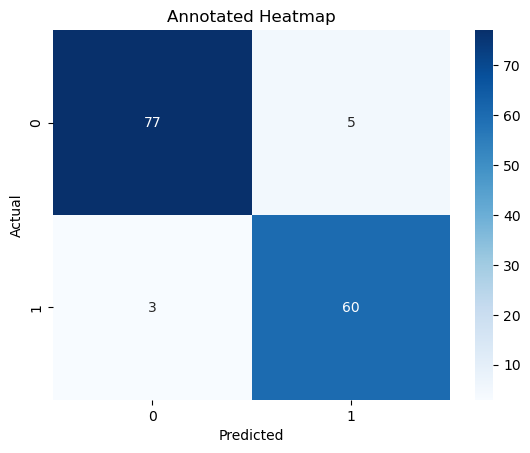

In [34]:
# confusion matrix

CM = confusion_matrix(t_test,t_test_pred)
sns.heatmap(CM, annot=True, cmap='Blues', fmt='d')
plt.title("Annotated Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
#ROC_curve _score
roc_auc = roc_auc_score(t_test, t_test_pred)
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.9457


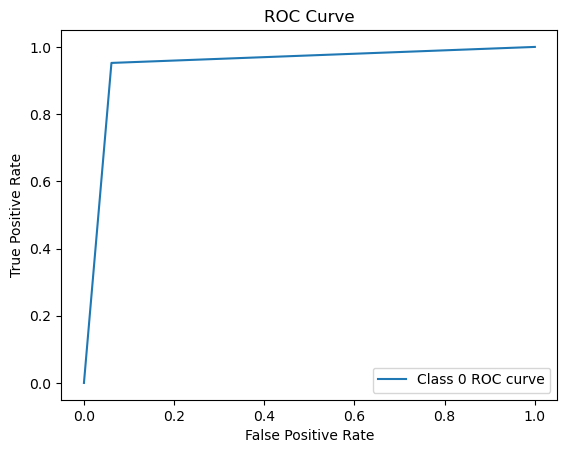

In [36]:
# ROC curve

fpr, tpr, _ = roc_curve(t_test, t_test_pred)
plt.plot(fpr, tpr, label='Class 0 ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()